<a href="https://colab.research.google.com/github/mizutaninaoki/ml-practice/blob/master/SGD%EF%BC%88%E3%82%AF%E3%83%A9%E3%82%B9%E5%88%86%E9%A1%9E%EF%BC%89%E3%80%90Python%E3%81%A8scikit_learn%E3%81%A7%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%EF%BC%9A%E7%AC%AC1%E5%9B%9E%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing #機械学習用のライブラリを利用
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

In [ ]:
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = ['class', 'color', 'proline']
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


In [ ]:
#解説 3：プロットしてみる------------------------------------------------------
%matplotlib inline

x = df_wine["color"]
y = df_wine["proline"]
z = df_wine["class"]-1
# plt.scatter(x,y, c=z)
# plt.show()

In [ ]:
#解説 4：データの整形-------------------------------------------------------
X = df_wine[{'color', 'proline'}]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [ ]:
clf_result=linear_model.SGDClassifier(loss="hinge")

In [ ]:
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())
scores

平均正解率 =  0.877124183006536
正解率の標準偏差 =  0.09870363096982916


array([0.83333333, 0.77777778, 0.66666667, 0.83333333, 0.88888889,
       0.94444444, 1.        , 0.94444444, 0.88235294, 1.        ])

In [ ]:
#解説 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, test_size=0.1, random_state=0)
clf_result.fit(X_train, y_train)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(y_test, pre)
print("正答率 = ",ac_score)

正答率 =  0.8333333333333334


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


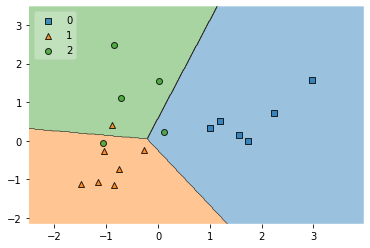

In [ ]:
#plotする
X_train_plot=np.vstack(X_train) # ndarray型に変換している(X_trainはすでにndarray型だから別に変換する必要ない。。。変換もX_train.valuesでできる。。。)
y_train_plot=np.hstack(y_train) # ndarray型に変換している
X_test_plot=np.vstack(X_test)
y_test_plot=np.hstack(y_test)
# plot_decision_regions(X_train_plot, y_train_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, y_test_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [ ]:
#解説 8：任意のデータに対する識別結果を見てみる------------------
# predicted_label=clf_result.predict([1,-1])
#print("このテストデータのラベル = ", predicted_label)

ValueError: ignored

In [ ]:
#解説 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[ 0.29403593 -3.82572048 -4.45715852]
[[ 14.87371292  -3.40593981]
 [ -8.57373128 -19.91406068]
 [ -5.70336771   4.69642127]]
